<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Random Numbers (Good)</span></div>

## 1 Random numbers from other distributions

### 1.1 Random numbers from the Normal distribution

In [1]:
import numpy as np
from numpy import random as rng

print(rng.normal(loc=5, scale=2, size=10))

[6.39837753 6.17666922 7.12585101 3.57148235 5.87063026 6.28559502
 5.80303072 5.54486017 7.7166263  4.21426824]


### 1.2 Visualising the random numbers

In [2]:
from matplotlib import pyplot as plt

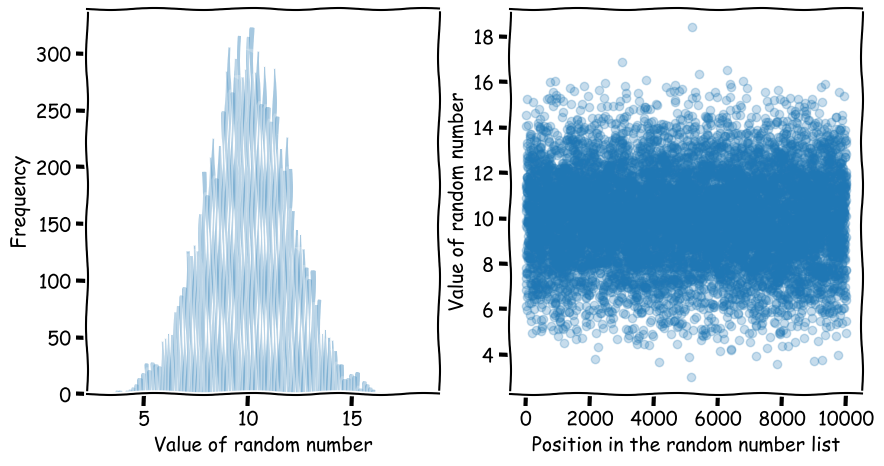

In [3]:
n = 10000
random_numbers = rng.normal(loc=10, scale=2, size=n)
plt.xkcd()
fig,ax = plt.subplots(nrows=1, ncols=2, figsize = (10,5))
axis = ax[0]
axis.hist(random_numbers, bins=100, alpha=.25)
axis.set_xlabel("Value of random number")
axis.set_ylabel("Frequency")

axis = ax[1]
axis.scatter(range(n), random_numbers, alpha=.25)
axis.set_xlabel("Position in the random number list")
axis.set_ylabel("Value of random number")

plt.show()

### 1.3 68%?

In [4]:
n = 10000
mean, sd = 10, 2
random_numbers = rng.normal(loc = mean, scale = sd, size = n)

within_1sd = (mean-sd <= random_numbers) & (random_numbers <= mean+sd)
# recall: np arrays and the & operator. This is a logical operator that creates an array
# the array is stored in within_1sd, and it an array of elements that satisfy both criteria
# this new array, within_1sd, stores all elements that satisfied both of those critera

print(f'{np.sum(within_1sd)/n*100:.2f}% of points were within 1 std of the mean')

68.01% of points were within 1 std of the mean


## 1 Brownian Motion in 1D

### 1.1 The scenario

A random walk is where a particle moves either "left" or "right", with P(left) being an arbitrary value in \[0,1\] and P(right) = 1-P(left).

Of course it doesn't have to always mean left or right, it's just a binary check

### 1.2 The simulation

In [5]:
def brownian_1d(prob_right = .5, no_of_steps = 10000):
    step_size = 1
    x = 0
    
    for i in range(no_of_steps):
        if rng.random() < prob_right:
            x += step_size
        else:
            x -= step_size
    return x

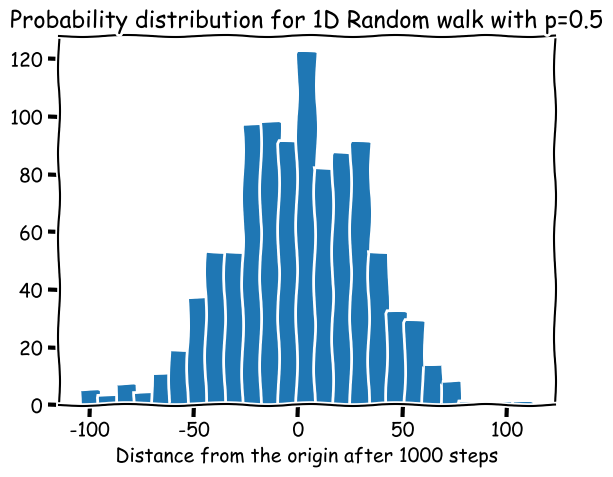

In [6]:
no_of_steps, p = 1_000, .5
repeats = 1000
results = [brownian_1d(prob_right=p, no_of_steps=no_of_steps) for i in range(repeats)]
plt.hist(results, bins=25)
plt.xlabel(f'Distance from the origin after {no_of_steps} steps')
plt.title(f'Probability distribution for 1D Random walk with p={p}')
plt.show()

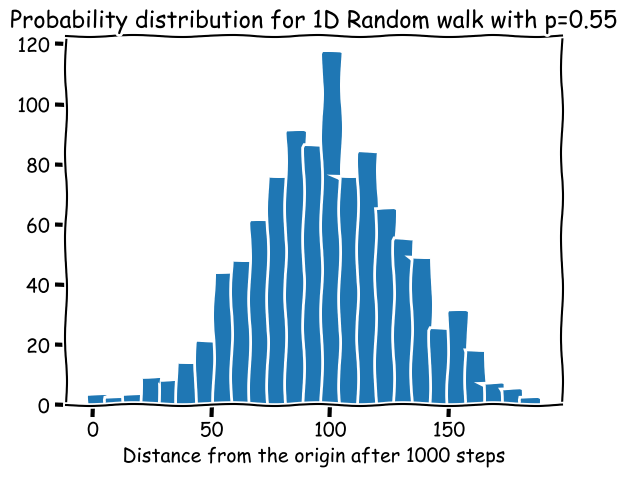

In [7]:
no_of_steps, p = 1_000, .55
repeats = 1000
results = [brownian_1d(prob_right=p, no_of_steps=no_of_steps) for i in range(repeats)]
plt.hist(results, bins=25)
plt.xlabel(f'Distance from the origin after {no_of_steps} steps')
plt.title(f'Probability distribution for 1D Random walk with p={p}')
plt.show()

### 1.3 What does theory say?

In [ ]:
def normal(x, m=0, s=1):
    '''
    Probability density function for the
    Gaussian distribution.
    '''
    s2 = s**2
    output = np.exp(-(x-m)**2/(2*s2))
    output /= np.sqrt(2*np.pi*s2)
    return output

no_of_steps, p = 1000, .5
repeats = 10000
results = [brownian_1d(prob_right=p, no_of_steps=no_of_steps) for i in range(repeats)]

plt.hist(results, bins=25, density=True)
plt.xlabel(f'Distance from the origin after {no_of_steps} steps')
plt.title(f'Probability distribution for 1D Random walk with p={p}')

prob_left = 1 - prob_right                       # q = 1 -p
mean = no_of_steps * (prob_right - prob_left)    # mean = N(p - q)
sd = np.sqrt(4*no_of_steps*prob_right*prob_left) # sd = sqrt(4 N p q)
x = np.unique(results)                           # Numbers that form 
                                                 # the x-axis
plt.plot(x, normal(x, mean, sd), label='Theoretical')
plt.show()

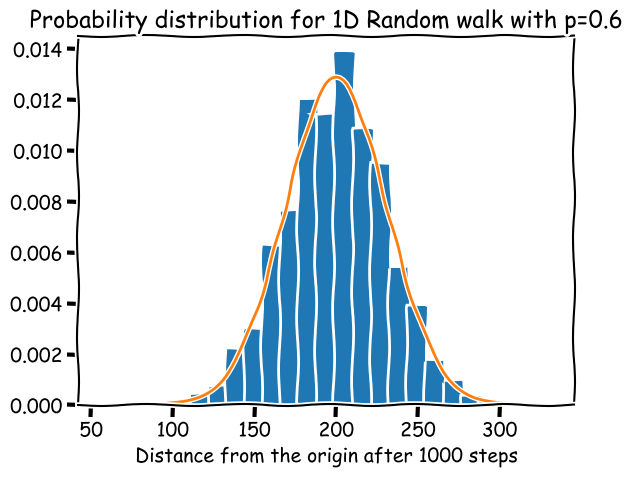

In [26]:
def normal(x, m=0, s=1):
    '''
    Probability density function for the
    Gaussian distribution.
    '''
    s2 = s**2
    output = np.exp(-(x-m)**2/(2*s2))
    output /= np.sqrt(2*np.pi*s2)
    return output

no_of_steps, p = 1000, .6
prob_right = p
repeats = 10000
results = [brownian_1d(prob_right=p, no_of_steps=no_of_steps) for i in range(repeats)]

plt.hist(results, bins=25, density=True)
plt.xlabel(f'Distance from the origin after {no_of_steps} steps')
plt.title(f'Probability distribution for 1D Random walk with p={p}')

prob_left = 1 - prob_right                       # q = 1 -p
mean = no_of_steps * (prob_right - prob_left)    # mean = N(p - q)
sd = np.sqrt(4*no_of_steps*prob_right*prob_left) # sd = sqrt(4 N p q)
x = np.unique(results)                           # Numbers that form 
                                                 # the x-axis
plt.plot(x, normal(x, m=mean, s=sd), label='Theoretical')
plt.show()

## 2 Estimating \(\pi\)

### 2.1 The method

$pi$ = 4*area of green/area of square

### 2.2 A poor but intuitive solution

In [28]:
n_total = 100000
n_green = 0

for i in range(n_total):
    x=rng.uniform(low=-1,high=1, size=1)
    y=rng.uniform(low=-1,high=1, size=1)
    r = np.sqrt(x**2 + y**2)
    
    if r <= 1:
        n_green += 1
print(4*(n_green/n_total))

3.1374


### 2.3 A better solution

In [30]:
n = 100000
n_green = 0

x = rng.uniform(low = -1, high = 1, size = n)
y = rng.uniform(low = -1, high = 1, size = n)
#this solution is better because it's faster and you can generate all your values at once
#as compared to the previous solution where you were generating your data points one at a time iteratively
n_green = np.sum((x**2+y**2)<=1)

print(4*n_green/n)

3.14312


### 2.4 A smarter solution

In [31]:
n = 1000000
x = rng.rand(n)
y = rng.rand(n)
n_green = np.sum((x**2+y**2)<=1)

print(4*n_green/n)

3.141324


## Exercise 1 :  Vital Stats of Random π

In [80]:
def estimate_pi(n):
    x=rng.rand(n)
    y=rng.rand(n)
    n_green=np.sum((x**2+y**2) <= 1)
    return 4*(n_green / n)

def repeat_estimate_pi(repeats, n):
    def estimate_pi(n):
        x=rng.rand(n)
        y=rng.rand(n)
        n_green=np.sum((x**2+y**2) <= 1)
        return 4*(n_green / n)
    
    values = [estimate_pi(n) for i in range(repeats)]
    mean_pi = np.sum(values)/len(values)
    std_pi = np.std(values)
    
    return mean_pi, std_pi

n_numbers = [10, 100, 1000, 10000, 100000, 1000000]
mean_pi_values = []
std_pi_values = []
for i in n_numbers:
    current = repeat_estimate_pi(100, i)
    mean_pi_values.append(current[0])
    std_pi_values.append(current[1])

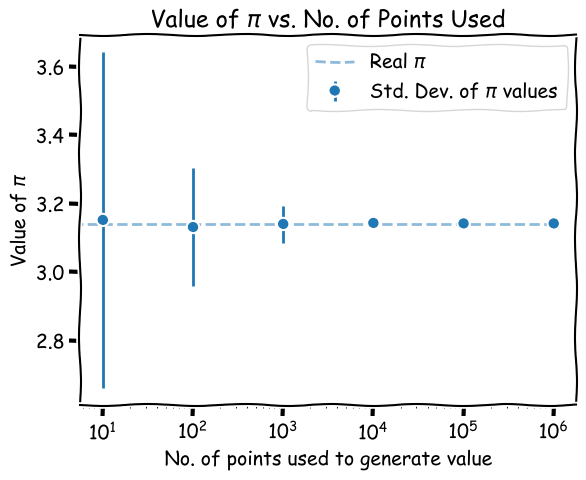

In [81]:
plt.errorbar(n_numbers, mean_pi_values, yerr = std_pi_values, fmt = "o", label = "Std. Dev. of $\pi$ values")
plt.xscale('log')
plt.hlines(np.pi, 0, 10**6, ls = "dashed", alpha = .5, label = "Real $\pi$")
plt.title(label = f'Value of $\pi$ vs. No. of Points Used')
plt.xlabel(xlabel = "No. of points used to generate value")
plt.ylabel(ylabel = "Value of $\pi$")
plt.legend()


plt.show()